**Alerting people via Crowd Density Estimation**


---



Submitted as part of the SAMHAR COVID-19 Hackathon

*Contributors*
*   Ashutosh Agrahari (ashutoshmathsgenius@gmail.com)
*   Ankur Veer (ankurveer011@gmail.com)
*   Anshuman Singh (singhanshuman999@gmail.com)

In [0]:
import h5py
import scipy.io as io
import PIL.Image as Image
import numpy as np
import os
import glob
from matplotlib import pyplot as plt
from scipy.ndimage.filters import gaussian_filter
import scipy
import json
import tqdm
import torchvision.transforms.functional as F
from matplotlib import cm as CM
from image import *
from model import CSRNet
import torch
from torchvision import datasets, transforms

transform=transforms.Compose([
                      transforms.ToTensor(),transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                    std=[0.229, 0.224, 0.225])])


In [0]:
## Load Model

model = CSRNet()
model = model.cuda()

In [0]:

## Load checkpointed model
checkpoint = torch.load('trained_model_best.pth.tar')


In [0]:
model.load_state_dict(checkpoint['state_dict'])


<All keys matched successfully>

In [0]:
## Load image paths to calculate MAE measure
part_A_train = 'E:/Scholastic/Competitions/SAMHAR-COVID19/COVID-19 Crowd Counting/FINAL_Crowd_Analyser/data/part_A/train_data/images'
part_A_test = 'E:/Scholastic/Competitions/SAMHAR-COVID19/COVID-19 Crowd Counting/FINAL_Crowd_Analyser/data/part_A/test_data/images'
part_B_train = 'E:/Scholastic/Competitions/SAMHAR-COVID19/COVID-19 Crowd Counting/FINAL_Crowd_Analyser/data/part_B/train_data/images'
part_B_test = 'E:/Scholastic/Competitions/SAMHAR-COVID19/COVID-19 Crowd Counting/FINAL_Crowd_Analyser/data/part_B/test_data/images'
path_sets = [part_A_test]

img_paths = []
for path in path_sets:
    for img_path in glob.glob(os.path.join(path, '*.jpg')):
       img_paths.append(img_path)

In [0]:
## Calculate MAE measure for evaluating model performance

mae = 0

for i in range(len(img_paths)):
    img = transform(Image.open(img_paths[i]).convert('RGB')).cuda()
    gt_file = h5py.File(img_paths[i].replace('.jpg','.h5').replace('images','ground-truth'),'r')
    groundtruth = np.asarray(gt_file['density'])
    output = model(img.unsqueeze(0))
    mae += abs(output.detach().cpu().sum().numpy()-np.sum(groundtruth))


In [0]:
print ("MAE: ",mae/len(img_paths))


MAE:  75.69089721847367


In [0]:
## Inferencing

from matplotlib import cm as c
img = transform(Image.open('data/part_A/test_data/images/IMG_100.jpg').convert('RGB')).cuda()


In [0]:
## SOME RESULTS of Croud Density Estimation Algorithm

Predicted Count :  384


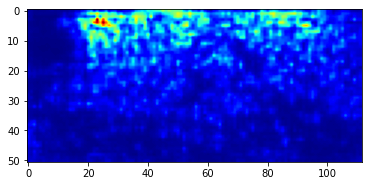

Original Count :  384


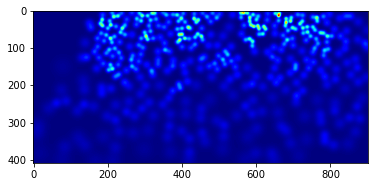

Original Image


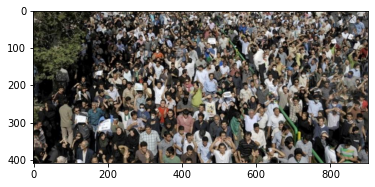

In [0]:
output = model(img.unsqueeze(0))
print("Predicted Count : ",int(output.detach().cpu().sum().numpy()))
temp = np.asarray(output.detach().cpu().reshape(output.detach().cpu().shape[2],output.detach().cpu().shape[3]))
plt.imshow(temp,cmap = c.jet)
plt.show()
temp = h5py.File('data/part_A/test_data/ground-truth/IMG_100.h5', 'r')
temp_1 = np.asarray(temp['density'])
plt.imshow(temp_1,cmap = c.jet)
print("Original Count : ",int(np.sum(temp_1)) + 1)
plt.show()
print("Original Image")
plt.imshow(plt.imread('data/part_A/test_data/images/IMG_100.jpg'))
plt.show()


Original Image


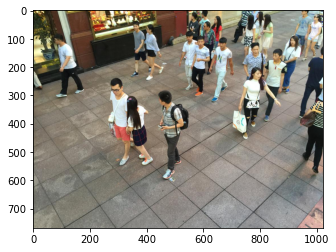

In [0]:
print("Original Image")
plt.imshow(plt.imread('data/part_B/test_data/images/IMG_1.jpg'))
plt.show()


Predicted Count :  54
Please don't gather here. You are being monitored.


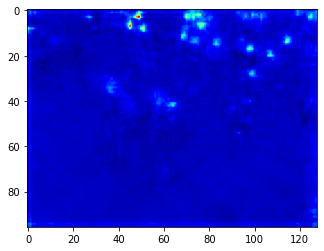

In [0]:
## Inferencing
## Alert generated when predicted count of people in the area exceeds 5.

from matplotlib import cm as c
img = transform(Image.open('data/part_B/test_data/images/IMG_1.jpg').convert('RGB')).cuda()
output = model(img.unsqueeze(0))
print("Predicted Count : ",int(output.detach().cpu().sum().numpy()))
pred = np.asarray(output.detach().cpu().reshape(output.detach().cpu().shape[2],output.detach().cpu().shape[3]))
pred_count = int(output.detach().cpu().sum().numpy())
if pred_count > 5:
    print("Please don't gather here. You are being monitored.")
## else do nothing
plt.imshow(pred,cmap = c.jet)
plt.show()
